## Loan Prediction

In [227]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.svm import LinearSVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.ensemble import BaggingClassifier
from sklearn.metrics import confusion_matrix as cm
from sklearn.ensemble import AdaBoostClassifier

In [228]:
loan = pd.read_csv(r'C:\Users\admin\Desktop\Skillathon\loan_prediction.csv')

## Undertanding the data

In [229]:
print("Features \n",loan.columns)
print(loan.info())
print("\n\n Description \n",loan.describe())
print("\n\n Datset \n",loan.head())

Features 
 Index(['Loan_ID', 'Gender', 'Married', 'Dependents', 'Education',
       'Self_Employed', 'ApplicantIncome', 'CoapplicantIncome', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Property_Area', 'Loan_Status'],
      dtype='object')
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
Loan_ID              614 non-null object
Gender               601 non-null object
Married              611 non-null object
Dependents           599 non-null object
Education            614 non-null object
Self_Employed        582 non-null object
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           592 non-null float64
Loan_Amount_Term     600 non-null float64
Credit_History       564 non-null float64
Property_Area        614 non-null object
Loan_Status          614 non-null object
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB
None


 Description 
        ApplicantInc

In [230]:
loan.sample()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
372,LP002201,Male,Yes,2,Graduate,Yes,9323,7873.0,380.0,300.0,1.0,Rural,Y


## Data Cleaning

In [231]:
# Check null values in data
print("Total null values in data \n",loan.isnull().sum().sum())
print("\nNull values for individual features \n",loan.isnull().sum())
print("\n Row wise nan values\n")
for i in range(len(loan.index)):
    print("Nan in row",i,":",loan.iloc[i].isnull().sum())

Total null values in data 
 149

Null values for individual features 
 Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

 Row wise nan values

Nan in row 0 : 1
Nan in row 1 : 0
Nan in row 2 : 0
Nan in row 3 : 0
Nan in row 4 : 0
Nan in row 5 : 0
Nan in row 6 : 0
Nan in row 7 : 0
Nan in row 8 : 0
Nan in row 9 : 0
Nan in row 10 : 0
Nan in row 11 : 1
Nan in row 12 : 0
Nan in row 13 : 0
Nan in row 14 : 0
Nan in row 15 : 0
Nan in row 16 : 1
Nan in row 17 : 0
Nan in row 18 : 0
Nan in row 19 : 2
Nan in row 20 : 0
Nan in row 21 : 0
Nan in row 22 : 0
Nan in row 23 : 1
Nan in row 24 : 2
Nan in row 25 : 0
Nan in row 26 : 0
Nan in row 27 : 0
Nan in row 28 : 0
Nan in row 29 : 1
Nan in row 30 : 2
Nan in row 31 : 0
Nan in row 32 :

In [232]:
loan.columns
# Cleaning categorical values
categorical_values = ['Gender','Married','Education','Self_Employed','Property_Area']

In [233]:
for i in categorical_values:
    loan[i] = loan[i].fillna( loan[i].dropna().mode().values[0] )
    print(i,loan[i].isnull().sum())

Gender 0
Married 0
Education 0
Self_Employed 0
Property_Area 0


In [234]:
# Cleaning numerical values
numerical_values = ['Dependents','Loan_Amount_Term','Credit_History']
for i in numerical_values:
    loan[i] = loan[i].fillna(loan[i].dropna().mode().values[0] )
    print(i,loan[i].isnull().sum())
loan['LoanAmount'] = loan['LoanAmount'].fillna(loan['LoanAmount'].dropna().mean())
print("Loan Amount ",loan['LoanAmount'].isnull().sum())

Dependents 0
Loan_Amount_Term 0
Credit_History 0
Loan Amount  0


In [235]:
loan.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

## Visuals

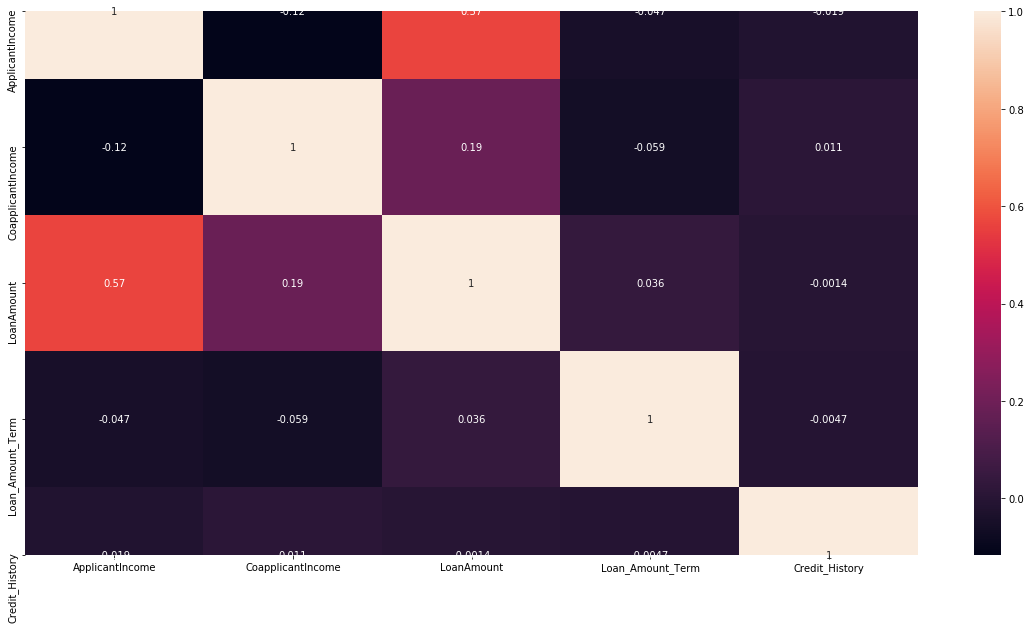

In [236]:
fig = plt.figure(figsize = (20,10))
corr = loan.corr()
sns.heatmap(corr, xticklabels = corr.columns, yticklabels=corr.columns, annot = True)
plt.show()

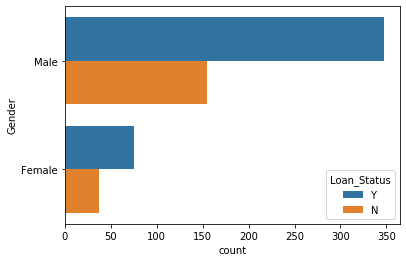

In [237]:
sns.countplot(y='Gender', hue='Loan_Status', data=loan)

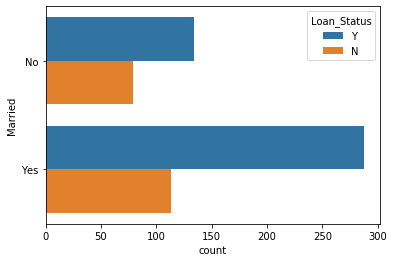

In [238]:
sns.countplot(y='Married', hue='Loan_Status', data=loan)

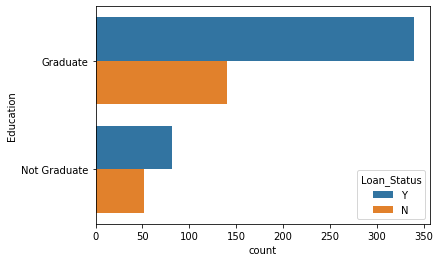

In [239]:
sns.countplot(y='Education', hue='Loan_Status', data=loan)

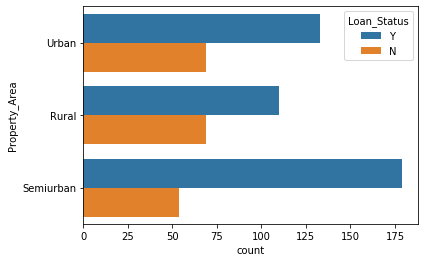

In [240]:
sns.countplot(y='Property_Area', hue='Loan_Status', data=loan)

C:\Users\admin\Anaconda3\lib\site-packages\seaborn\axisgrid.py:230: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


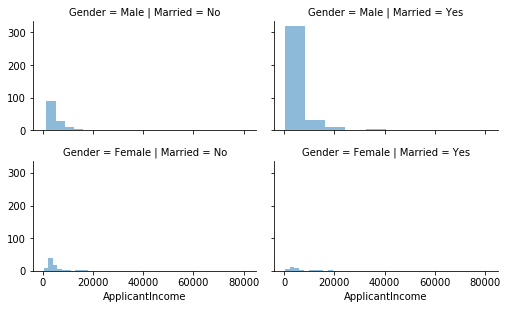

In [241]:
grid = sns.FacetGrid(loan, row='Gender', col='Married',size=2.2,aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()

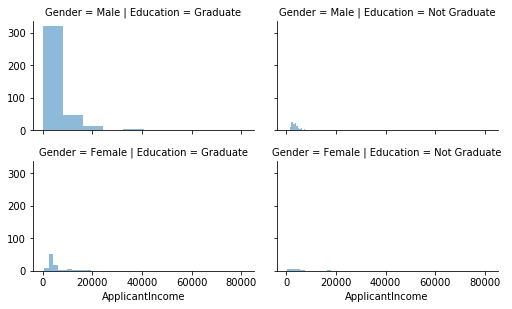

In [242]:
grid = sns.FacetGrid(loan, row='Gender', col='Education',size=2.2,aspect=1.6)
grid.map(plt.hist, 'ApplicantIncome', alpha=0.5, bins=10)
grid.add_legend()

## Data Transformation

In [243]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder

In [244]:
code_numeric = {'Male':1, 'Female':2,'Yes':1,'No':2,'Graduate':1,'Not Graduate':2,'Urban':3,'Semiurban':2,'Rural':1,'Y':1,'N':2,'3+':3}

In [245]:
loan = loan.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
#loan_test = loan_test.applymap(lambda s: code_numeric.get(s) if s in code_numeric else s)
loan.drop('Loan_ID',axis=1,inplace=True)

In [246]:
print(loan.head())
print("\n\nAfter Encoding \n",loan['Dependents'].value_counts())

   Gender  Married Dependents  Education  Self_Employed  ApplicantIncome  \
0       1        2          0          1              2             5849   
1       1        1          1          1              2             4583   
2       1        1          0          1              1             3000   
3       1        1          0          2              2             2583   
4       1        2          0          1              2             6000   

   CoapplicantIncome  LoanAmount  Loan_Amount_Term  Credit_History  \
0                0.0  146.412162             360.0             1.0   
1             1508.0  128.000000             360.0             1.0   
2                0.0   66.000000             360.0             1.0   
3             2358.0  120.000000             360.0             1.0   
4                0.0  141.000000             360.0             1.0   

   Property_Area  Loan_Status  
0              3            1  
1              1            2  
2              3          

In [247]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Dependents           614 non-null object
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
dtypes: float64(4), int64(7), object(1)
memory usage: 57.7+ KB


- From above result we see Dependents is object so we need to convert to numeric

In [248]:
Dependents_ = pd.to_numeric(loan.Dependents)
loan.drop(['Dependents'], axis=1, inplace=True)
loan = pd.concat([loan, Dependents_], axis=1)

In [249]:
loan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 12 columns):
Gender               614 non-null int64
Married              614 non-null int64
Education            614 non-null int64
Self_Employed        614 non-null int64
ApplicantIncome      614 non-null int64
CoapplicantIncome    614 non-null float64
LoanAmount           614 non-null float64
Loan_Amount_Term     614 non-null float64
Credit_History       614 non-null float64
Property_Area        614 non-null int64
Loan_Status          614 non-null int64
Dependents           614 non-null int64
dtypes: float64(4), int64(8)
memory usage: 57.7 KB


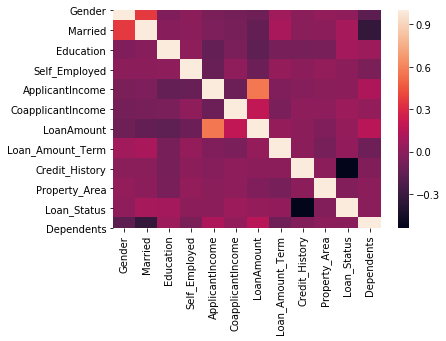

In [250]:
sns.heatmap(loan.corr())

## Data preparation for model

In [251]:
x_train, x_test = train_test_split(loan, test_size=0.2)
x_test

,Gender,Married,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,Dependents
316,1,1,1,2,3717,0.000000,120.0,360.0,1.0,2,1,2
517,1,1,2,2,3074,1800.000000,123.0,360.0,0.0,2,2,0
24,1,1,1,2,3717,2925.000000,151.0,360.0,1.0,2,2,1
78,1,1,1,2,3167,4000.000000,180.0,300.0,0.0,2,2,3
1,1,1,1,2,4583,1508.000000,128.0,360.0,1.0,1,2,1
...,...,...,...,...,...,...,...,...,...,...,...,...
282,1,1,1,2,2301,985.799988,78.0,180.0,1.0,3,1,2
573,1,1,2,2,6125,1625.000000,187.0,480.0,1.0,2,2,2
13,1,2,1,2,1853,2840.000000,114.0,360.0,1.0,1,2,0
180,1,1,1,2,6400,7250.000000,180.0,360.0,0.0,3,2,1


In [252]:
y = loan['Loan_Status']
x = loan.drop('Loan_Status',axis=1)

In [253]:
x_train, x_test, y_train, y_test = train_test_split(x,y,test_size=0.2,random_state=0)

## Model Building

In [254]:
log_reg = LogisticRegression()
log_reg.fit(x_train,y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='l2',
                   random_state=None, solver='warn', tol=0.0001, verbose=0,
                   warm_start=False)

In [255]:
svm = LinearSVC(max_iter=100)
svm.fit(x_train,y_train)

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\svm\base.py:929: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  "the number of iterations.", ConvergenceWarning)


LinearSVC(C=1.0, class_weight=None, dual=True, fit_intercept=True,
          intercept_scaling=1, loss='squared_hinge', max_iter=100,
          multi_class='ovr', penalty='l2', random_state=None, tol=0.0001,
          verbose=0)

In [256]:
knn = KNeighborsClassifier()
knn.fit(x_train,y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
                     metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                     weights='uniform')

In [257]:
dt = DecisionTreeClassifier()
dt.fit(x_train,y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [258]:
pred_lg = log_reg.predict(x_test)
pred_svm = svm.predict(x_test)
pred_knn = knn.predict(x_test)
pred_dt = dt.predict(x_test)
print(pred_lg[2])
print(pred_svm[2])
print(pred_knn[2])
print(pred_dt[2])

1
1
1
2


- From above predictions we observe that for 2nd index in x_test Logistic, SVM, KNN have classified in 1 category i.e 'Y' whereas Decision tree classified as 'N'

## Model Evaluation

In [259]:
print("Logistic \n",accuracy_score(y_test, pred_lg))
print("\n\nSVM \n",accuracy_score(y_test, pred_svm))
print("\n\nKNN \n",accuracy_score(y_test, pred_knn))
print("\n\nDecision Tree \n",accuracy_score(y_test, pred_dt))

Logistic 
 0.8373983739837398


SVM 
 0.7317073170731707


KNN 
 0.6504065040650406


Decision Tree 
 0.6829268292682927


In [260]:
print("Logistic \n",classification_report(y_test, pred_lg))
print("\n\nSVM \n",classification_report(y_test, pred_svm))
print("\n\nKNN \n",classification_report(y_test, pred_knn))
print("\n\nDecision Tree \n",classification_report(y_test, pred_dt))

Logistic 
               precision    recall  f1-score   support

           1       0.83      0.98      0.90        90
           2       0.88      0.45      0.60        33

    accuracy                           0.84       123
   macro avg       0.86      0.72      0.75       123
weighted avg       0.84      0.84      0.82       123



SVM 
               precision    recall  f1-score   support

           1       0.73      1.00      0.85        90
           2       0.00      0.00      0.00        33

    accuracy                           0.73       123
   macro avg       0.37      0.50      0.42       123
weighted avg       0.54      0.73      0.62       123



KNN 
               precision    recall  f1-score   support

           1       0.74      0.81      0.77        90
           2       0.29      0.21      0.25        33

    accuracy                           0.65       123
   macro avg       0.51      0.51      0.51       123
weighted avg       0.62      0.65      0.63    

C:\Users\admin\Anaconda3\lib\site-packages\sklearn\metrics\classification.py:1437: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## Improving accuracy of Models
- Above evaluated models differ from each other with Logistic as most accurate and KNN the least

In [261]:
# Bagging
bag_clf = BaggingClassifier(
    DecisionTreeClassifier(random_state=29), n_estimators=500,
    max_samples=100, bootstrap=True, n_jobs=-1, random_state=29
)

bag_clf.fit(x_train, y_train)
pred_bagging = bag_clf.predict(x_test)
print(pred_bagging[2])
print(pred_dt[2])

1
2


In [262]:
# Boosting
ada_clf = AdaBoostClassifier(
    DecisionTreeClassifier(max_depth=1), n_estimators=200,
    learning_rate=0.5, random_state=50
)

ada_clf.fit(x_train, y_train)
pred_boosting = ada_clf.predict(x_test)
print(pred_boosting[2])

1


### Decision Tree with accuracy 69 % classifies 2nd index as 'N' while Bagging and Boosting with improved accuracy of 82% classifies as 1 

In [263]:
print("Bagging accuracy:",accuracy_score(y_test, pred_bagging))
print("Boosting accuracy:",accuracy_score(y_test, pred_boosting))
print("\n\n",classification_report(y_test, pred_bagging))
print("\n\n",classification_report(y_test, pred_boosting))

Bagging accuracy: 0.8292682926829268
Boosting accuracy: 0.8292682926829268


               precision    recall  f1-score   support

           1       0.82      0.98      0.89        90
           2       0.88      0.42      0.57        33

    accuracy                           0.83       123
   macro avg       0.85      0.70      0.73       123
weighted avg       0.84      0.83      0.81       123



               precision    recall  f1-score   support

           1       0.84      0.94      0.89        90
           2       0.77      0.52      0.62        33

    accuracy                           0.83       123
   macro avg       0.81      0.73      0.75       123
weighted avg       0.82      0.83      0.82       123



## Comparing using confusion matrix

In [264]:
print("Decision Tree\n",cm(y_test, pred_dt))
print("\nBagging\n",cm(y_test, pred_bagging))
print("\nBoosting\n",cm(y_test, pred_boosting))

Decision Tree
 [[65 25]
 [14 19]]

Bagging
 [[88  2]
 [19 14]]

Boosting
 [[85  5]
 [16 17]]


### When compared to Bagging and Ada boost method Bagging is more optimal